# Logistic Regression Model

## Import libraries

In [154]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


from sklearn.linear_model import LogisticRegression

%matplotlib inline 

## Load and review data

In [155]:
columns = ["age", "workClass", "fnlwgt", "education", "education-num",
           "marital-status", "occupation", "relationship", "race", "sex", 
           "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', sep=' *, *', na_values='?', names = columns)
test = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', sep=' *, *', na_values='?', skiprows = 1, names = columns)

/Users/austinbarrow/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [156]:
data.head()


,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [157]:
test.head()

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


### Definition of Features

| **Feature** | **Description** | **Comments** |
|:-------:|:-----------:|:--------:|
| age | age of the person | None |
| workClass | type of employment | None |
| fnlwgt | How many people have this same set of features | Has no weight on the target value (income), will remove |
| education | maximum education a person has recieved | Will remove this one and just use education-num |
| education-num | amount of education years | None |
| marital-status | marital status | None |
| occupation | your occupation | None |
| relationship | what relationships you have | redundant, will remove |
| race | race | None |
| sex | sex | None |
| capital-gain | how much capital gain a person has | None |
| capital-loss | how much capital loss a person has | None |
| hours-per-week | how many hours per week a person works | None |
| native-country | birth country | None |
| income | binary value representing less than or more than 50k | None |


## Clean Data

### Remove un-needed columns

In [158]:
del data['fnlwgt'], data['education'], data['relationship']
del test['fnlwgt'], test['education'], test['relationship']
test.head(5)

,age,workClass,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,9,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States,>50K.
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,10,Never-married,NaN,White,Female,0,0,30,United-States,<=50K.


### Check for null values

In [159]:
data.isnull().values.any()

True

### Missing Values

In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workClass       30725 non-null  object
 2   education-num   32561 non-null  int64 
 3   marital-status  32561 non-null  object
 4   occupation      30718 non-null  object
 5   race            32561 non-null  object
 6   sex             32561 non-null  object
 7   capital-gain    32561 non-null  int64 
 8   capital-loss    32561 non-null  int64 
 9   hours-per-week  32561 non-null  int64 
 10  native-country  31978 non-null  object
 11  income          32561 non-null  object
dtypes: int64(5), object(7)
memory usage: 3.0+ MB


32561 Values in total. You can see that workClass, occupation, and native-country has missing values.

There are lots of strategies to deal with missing values. 

    - Delete the data that contains the missing values
    
    - Replace the missing values with something like the mean, average, most frequent value of the column

    - Remove the feature that contains the missing values

    - Predict the missing values

With categorical columns that have missing values, we will change the missing values to the most frequent value of the column.

In [161]:
data = data.fillna(data.mode().iloc[0])
test = test.fillna(test.mode().iloc[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workClass       32561 non-null  object
 2   education-num   32561 non-null  int64 
 3   marital-status  32561 non-null  object
 4   occupation      32561 non-null  object
 5   race            32561 non-null  object
 6   sex             32561 non-null  object
 7   capital-gain    32561 non-null  int64 
 8   capital-loss    32561 non-null  int64 
 9   hours-per-week  32561 non-null  int64 
 10  native-country  32561 non-null  object
 11  income          32561 non-null  object
dtypes: int64(5), object(7)
memory usage: 3.0+ MB


### Check data types

In [162]:
data.head(5)

,age,workClass,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,Cuba,<=50K


In [163]:
income_map = {'<=50K': 0, '>50K': 1}
income_map_test = {'<=50K.': 0, '>50K.': 1}
data['income']=data['income'].map(income_map)
test['income']=test['income'].map(income_map_test)

In [164]:
test.head(10)

,age,workClass,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Black,Male,0,0,40,United-States,0
1,38,Private,9,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States,0
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States,1
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0,40,United-States,1
4,18,Private,10,Never-married,Prof-specialty,White,Female,0,0,30,United-States,0
5,34,Private,6,Never-married,Other-service,White,Male,0,0,30,United-States,0
6,29,Private,9,Never-married,Prof-specialty,Black,Male,0,0,40,United-States,0
7,63,Self-emp-not-inc,15,Married-civ-spouse,Prof-specialty,White,Male,3103,0,32,United-States,1
8,24,Private,10,Never-married,Other-service,White,Female,0,0,40,United-States,0
9,55,Private,4,Married-civ-spouse,Craft-repair,White,Male,0,0,10,United-States,0


### Handling Categorical Values

In [165]:
all_work_class_set = set(data['workClass'].tolist() + test['workClass'].tolist())
all_marital_status_set = set(data['marital-status'].tolist() + test['marital-status'].tolist())
all_occupation_set = set(data['occupation'].tolist() + test['occupation'].tolist())
all_race_set = set(data['race'].tolist() + test['race'].tolist())
all_sex_set = set(data['sex'].tolist() + test['sex'].tolist())
all_native_country_set = set(data['native-country'].tolist() + test['native-country'].tolist())


all_work_class_dict = dict(zip(all_work_class_set, range(0, len(all_work_class_set))))
all_marital_status_dict = dict(zip(all_marital_status_set, range(0, len(all_marital_status_set))))
all_occupation_dict = dict(zip(all_occupation_set, range(0, len(all_occupation_set))))
all_race_dict = dict(zip(all_race_set,range(0, len(all_race_set))))
all_sex_dict = dict(zip(all_sex_set, range(0, len(all_sex_set))))
all_native_country_dict = dict(zip(all_native_country_set, range(0, len(all_native_country_set))))

data['workClass']=data['workClass'].map(all_work_class_dict)
data['marital-status']=data['marital-status'].map(all_marital_status_dict)
data['occupation']=data['occupation'].map(all_occupation_dict)
data['race']=data['race'].map(all_race_dict)
data['sex']=data['sex'].map(all_sex_dict)
data['native-country']=data['native-country'].map(all_native_country_dict)

test['workClass']=test['workClass'].map(all_work_class_dict)
test['marital-status']=test['marital-status'].map(all_marital_status_dict)
test['occupation']=test['occupation'].map(all_occupation_dict)
test['race']=test['race'].map(all_race_dict)
test['sex']=test['sex'].map(all_sex_dict)
test['native-country']=test['native-country'].map(all_native_country_dict)

data.head(10)
test.head(10)


,age,workClass,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,7,7,3,8,4,0,0,0,40,39,0
1,38,7,9,1,11,1,0,0,0,50,39,0
2,28,3,12,1,12,1,0,0,0,40,39,1
3,44,7,10,1,8,4,0,7688,0,40,39,1
4,18,7,10,3,9,1,1,0,0,30,39,0
5,34,7,6,3,6,1,0,0,0,30,39,0
6,29,7,9,3,9,4,0,0,0,40,39,0
7,63,1,15,1,9,1,0,3103,0,32,39,1
8,24,7,10,3,6,1,1,0,0,40,39,0
9,55,7,4,1,1,1,0,0,0,10,39,0


### Correlated features

In [166]:
def plot_corr(df, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

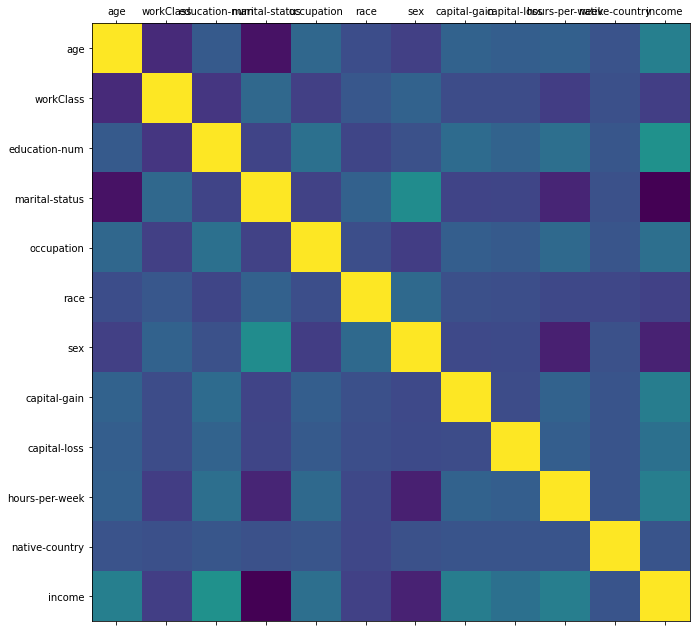

In [167]:
plot_corr(data)

### True/False ratio

In [168]:
num_obs = len(data)
num_greater_50k = len(data.loc[data['income'] == 1])
num_less_50k = len(data.loc[data['income'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_greater_50k, (num_greater_50k/num_obs) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_less_50k, (num_less_50k/num_obs) * 100))

num_obs = len(test)
num_greater_50k = len(test.loc[test['income'] == 1])
num_less_50k = len(test.loc[test['income'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_greater_50k, (num_greater_50k/num_obs) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_less_50k, (num_less_50k/num_obs) * 100))

Number of True cases:  7841 (24.08%)
Number of False cases: 24720 (75.92%)
Number of True cases:  3846 (23.62%)
Number of False cases: 12435 (76.38%)


### Split the data (Training and Testing)

not rn

## Train the Model

In [173]:
feature_col_names = ["age", "workClass", "education-num", "marital-status", "occupation", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country",]
target_col_name = "income"
X_data = data[feature_col_names].values
Y_data = data[target_col_name].values
X_test = test[feature_col_names].values
Y_test = test[target_col_name].values

### Naive Bayesian

In [198]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_data, Y_data.ravel())

GaussianNB()

### Random Forest

In [199]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_data, Y_data.ravel())

RandomForestClassifier(random_state=42)

## Evaluate the Model

### Naive Bayesian

In [200]:
nb_predict_train = nb_model.predict(X_data)
from sklearn import metrics

# Accuracy on Training Data
print("[Training Data] Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_data, nb_predict_train)))
print()
nb_predict_test = nb_model.predict(X_test)

# Accuracy on Testing Data
print("[Testing Data] Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_test, nb_predict_test)))
print()

# Confusion Matrix
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(Y_test, nb_predict_test)))
print("")

# Classification Report
print("Classification Report")
print(metrics.classification_report(Y_test, nb_predict_test))

[Training Data] Accuracy: 0.8013

[Testing Data] Accuracy: 0.8011

Confusion Matrix
[[11802   633]
 [ 2605  1241]]

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.95      0.88     12435
           1       0.66      0.32      0.43      3846

    accuracy                           0.80     16281
   macro avg       0.74      0.64      0.66     16281
weighted avg       0.78      0.80      0.77     16281



### Random Forest

In [201]:
rf_predict_train = rf_model.predict(X_data)
from sklearn import metrics

# Accuracy on Training Data
print("[Training Data] Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_data, rf_predict_train)))
print()
rf_predict_test = rf_model.predict(X_test)

# Accuracy on Testing Data
print("[Testing Data] Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_test, rf_predict_test)))
print()

# Confusion Matrix
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(Y_test, rf_predict_test)))
print("")

# Classification Report
print("Classification Report")
print(metrics.classification_report(Y_test, rf_predict_test))

[Training Data] Accuracy: 0.9748

[Testing Data] Accuracy: 0.8506

Confusion Matrix
[[11502   933]
 [ 1500  2346]]

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     12435
           1       0.72      0.61      0.66      3846

    accuracy                           0.85     16281
   macro avg       0.80      0.77      0.78     16281
weighted avg       0.84      0.85      0.85     16281

